# Prelimenaries

## Importing libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

import nltk
import string
import matplotlib.pyplot as plt # for plots
from matplotlib.patches import Patch
#import seaborn as sns # for plots

from wordcloud import WordCloud # for making wordcloud
import gensim # Topic modeling
from gensim.utils import simple_preprocess # tokenizing
import gensim.corpora as corpora # making word dictionary
from nltk.tokenize import word_tokenize # tokenizing (spliting sentences into words)
from nltk.probability import FreqDist # word frequency distribution plot

some important sets

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Reading data

In [ ]:
df = pd.read_csv('/content/B565 Student Data Set (Responses) -  Form Responses 1.csv')
df.head()

,Timestamp,What is your major/ school?,Age,How far do you live from campus?,Preferred mode of transportation for getting around the campus?,How much time do you spend on studying outside class per week? In hours.,"How much time do you spend on your hobbies? (Parties, Outings, Painting, Reading, Etc.) In hours",How much money do you spend on groceries per week?,How often do you work out,From 1 to 10 rate how stressful this semester has been,What factors have contributed the most to your stress?,What methods have you've used to cope with this stress?,Are you employed?,How would you rate your academic performance?,How often do you meet new people?,How many hours of sleep do you get?,Please describe/ list the problems you are facing at IU?
0,11/16/2023 17:30:09,"IU Luddy School of Informatic, Computing, and ...",1st year masters,Less than 1 mile away,Bus,30,10,80,"Intermittently, never consistant",8,"Academic pressure, Social relationships, Futur...",-,No,9,Every month,9.0,"Attending social events, drowning in assignments"
1,11/16/2023 17:38:12,College of Arts and Sciences,2nd year undergrad,Less than 1 mile away,Bus,6,10,50,Never,7,"Academic pressure, Future Uncertainty",Reading,"Yes, part-time",5,Every month,5.0,NaN
2,11/16/2023 17:39:18,IU Kelly School of Business,2nd year undergrad,On campus,Walking,5,5,20,Once a week,1,Academic pressure,Reading and doing exercise,No,9,Every week,8.0,NaN
3,11/16/2023 17:39:18,IU Kelly School of Business,1st year undergrad,On campus,Walking,10,8,50,"Intermittently, never consistant",8,"Academic pressure, Social relationships, Healt...",Listen to music,"Yes, part-time",6,Every day,7.0,"Homesickness, finding friends"
4,11/16/2023 17:41:33,IU Kelly School of Business,1st year undergrad,On campus,Walking,15,5,0,"Intermittently, never consistant",6,"Academic pressure, Future Uncertainty",Meditation,"Yes, full-time",9,Every day,6.0,Balancing responsibilities


# Data Cleaning

## Renaming columns

In [ ]:
df = df.rename(columns={'What is your major/ school?': 'School',
'How much time do you spend on studying outside class per week?  In hours.': 'Study Hours',
'How much time do you spend on your hobbies? (Parties, Outings, Painting, Reading, Etc.) In hours':'Hobbie Hours',
'How far do you live from campus? ':'Distance from campus',
'How much money do you spend on groceries per week?':'Grocery Spends',
'Preferred mode of transportation for getting around the campus?':'Transportation Mode',
'How often do you work out':'Workout Frequency',
'From 1 to 10 rate how stressful this semester has been': 'Stress Scale',
'What factors have contributed the most to your stress?':'Stress Factor',
"What methods have you've used to cope with this stress?":"Stress Cope",
"Are you employed? ":"Employement",
"How would you rate your academic performance?":"Academic Performance",
"How often do you meet new people?":"Socialize",
"How many hours of sleep do you get?":"Sleep Hours",
"Please describe/ list the problems you are facing at IU?":"Problems"})

## Converting responses to labels

In [ ]:
label_encoder = LabelEncoder()
df['School'] = label_encoder.fit_transform(df['School'])
df['Age'] = label_encoder.fit_transform(df['Age'])
df['Distance from campus'] = label_encoder.fit_transform(df['Distance from campus'])
df['Transportation Mode'] = label_encoder.fit_transform(df['Transportation Mode'])
df['Workout Frequency'] = label_encoder.fit_transform(df['Workout Frequency'])
df['Employement'] = label_encoder.fit_transform(df['Employement'])
df['Socialize'] = label_encoder.fit_transform(df['Socialize'])

## Dropping "Timestamp"

In [ ]:
df = df.drop('Timestamp',axis=1)

In [ ]:
df

,School,Age,Distance from campus,Transportation Mode,Study Hours,Hobbie Hours,Grocery Spends,Workout Frequency,Stress Scale,Stress Factor,Stress Cope,Employement,Academic Performance,Socialize,Sleep Hours,Problems
0,4,0,1,1,30,10,80,1,8,"Academic pressure, Social relationships, Futur...",-,0,9,1,9.0,"Attending social events, drowning in assignments"
1,0,3,1,1,6,10,50,3,7,"Academic pressure, Future Uncertainty",Reading,2,5,1,5.0,NaN
2,3,3,3,3,5,5,20,4,1,Academic pressure,Reading and doing exercise,0,9,2,8.0,NaN
3,3,1,3,3,10,8,50,1,8,"Academic pressure, Social relationships, Healt...",Listen to music,2,6,0,7.0,"Homesickness, finding friends"
4,3,1,3,3,15,5,0,1,6,"Academic pressure, Future Uncertainty",Meditation,1,9,0,6.0,Balancing responsibilities
5,5,2,3,3,4,6,150,2,3,Future Uncertainty,Social life,0,8,2,9.0,"Food halls are mid, too much junk food"
6,1,3,1,2,2,3,90,4,6,"Academic pressure, Future Uncertainty",Hanging with friends,2,8,2,8.0,No problems
7,3,3,1,1,4,4,40,1,8,"Academic pressure, Future Uncertainty",None,2,7,2,7.0,NaN
8,4,3,3,1,12,5,5,1,6,"Academic pressure, Social relationships, Futur...","Music, hanging out with friends, sleeping, tal...",2,6,2,8.0,Deciding my major
9,3,4,3,3,6,6,0,2,6,Academic pressure,Mindfulness,2,8,2,7.0,NaN


# Exploratory Data Analysis

Stress

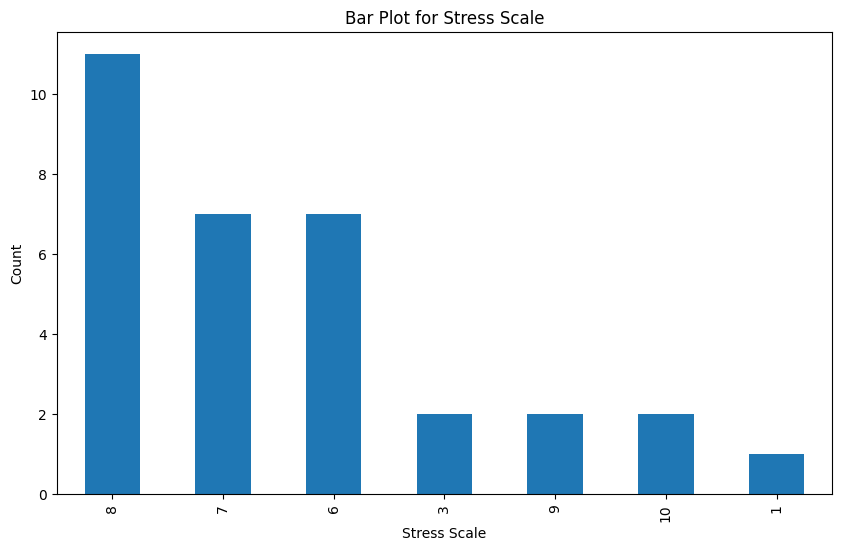

In [ ]:
category_counts = df['Stress Scale'].value_counts()

ax = category_counts.plot.bar(figsize=(10, 6))
ax.set_title('Bar Plot for Stress Scale')
ax.set_xlabel('Stress Scale')
ax.set_ylabel('Count')

plt.show()

Academic Performance

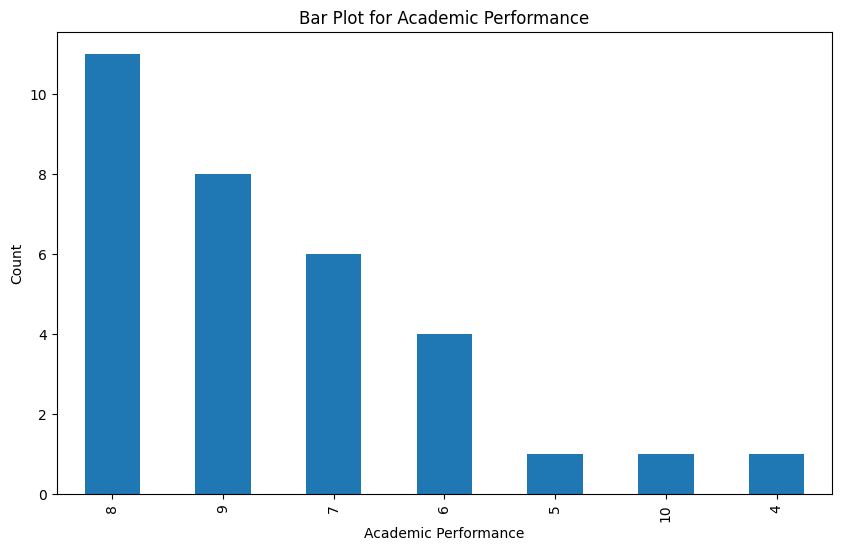

In [ ]:
category_counts = df['Academic Performance'].value_counts()

ax = category_counts.plot.bar(figsize=(10, 6))
ax.set_title('Bar Plot for Academic Performance')
ax.set_xlabel('Academic Performance')
ax.set_ylabel('Count')

plt.show()

Boxplot - Stress vs Study

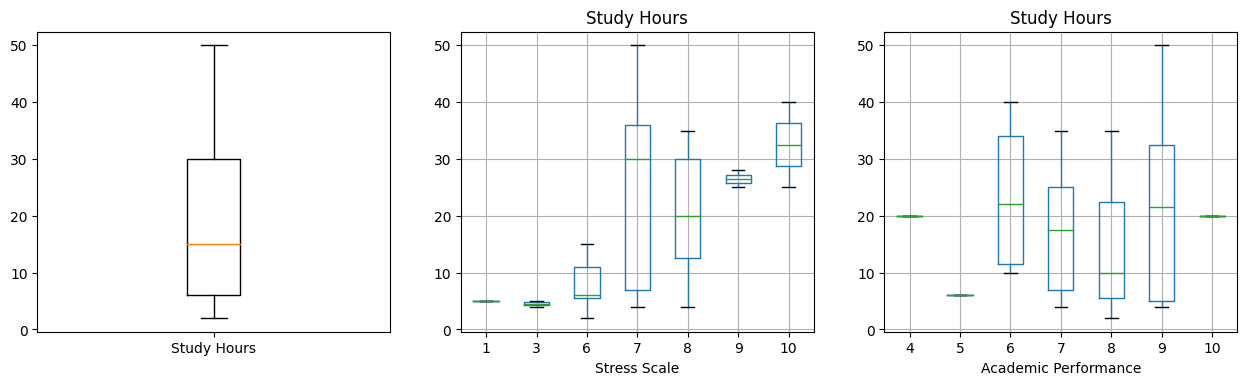

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(15, 4))
ax[0].boxplot(df['Study Hours'])
ax[0].set_xticklabels(['Study Hours'])
df.boxplot(column = 'Study Hours', by = 'Stress Scale', ax = ax[1])
df.boxplot(column = 'Study Hours', by = 'Academic Performance', ax = ax[2])
fig.suptitle('')
plt.show()

Boxplot - Stress vs groceries

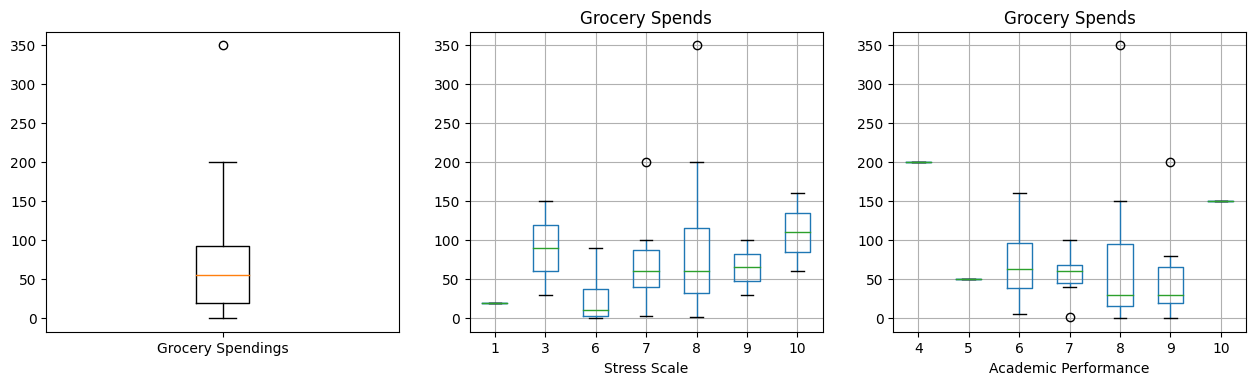

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(15, 4))
ax[0].boxplot(df['Grocery Spends'])
ax[0].set_xticklabels(['Grocery Spendings'])
df.boxplot(column = 'Grocery Spends', by = 'Stress Scale', ax = ax[1])
df.boxplot(column = 'Grocery Spends', by = 'Academic Performance', ax = ax[2])
fig.suptitle('')
plt.show()

Boxplot - Stress vs hobbies

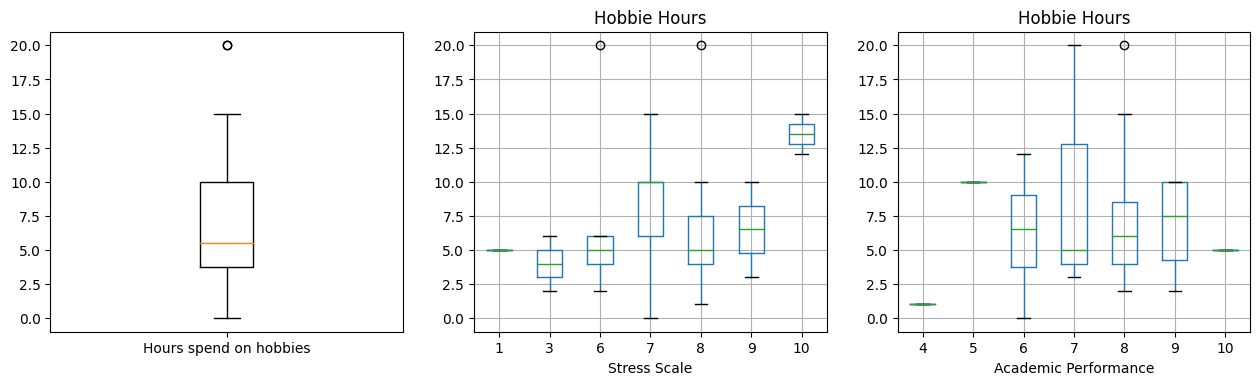

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(15, 4))
ax[0].boxplot(df['Hobbie Hours'])
ax[0].set_xticklabels(['Hours spend on hobbies'])
df.boxplot(column = 'Hobbie Hours', by = 'Stress Scale', ax = ax[1])
df.boxplot(column = 'Hobbie Hours', by = 'Academic Performance', ax = ax[2])
fig.suptitle('')
plt.show()

Boxplot - Stress vs Sleep

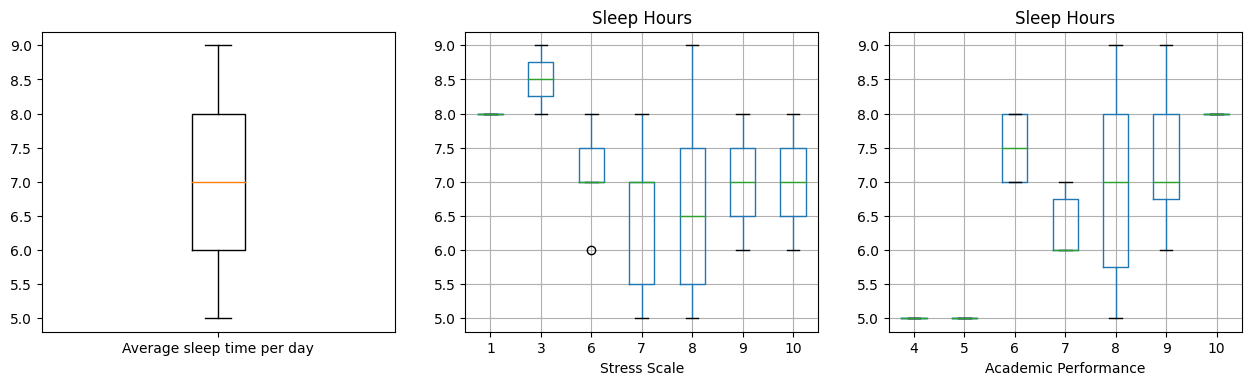

In [ ]:
# Someone gave answer for weekly hours, need to fix that
sleep = []
for x in df['Sleep Hours']:
  if x > 10:
    sleep.append(x/7)
  else:
    sleep.append(x)

df['Sleep Hours'] = sleep

fig, ax = plt.subplots(1,3, figsize=(15, 4))
ax[0].boxplot(df['Sleep Hours'])
ax[0].set_xticklabels(['Average sleep time per day'])
df.boxplot(column = 'Sleep Hours', by = 'Stress Scale', ax = ax[1])
df.boxplot(column = 'Sleep Hours', by = 'Academic Performance', ax = ax[2])
fig.suptitle('')
plt.show()

Stacked bar - Stress vs Workout

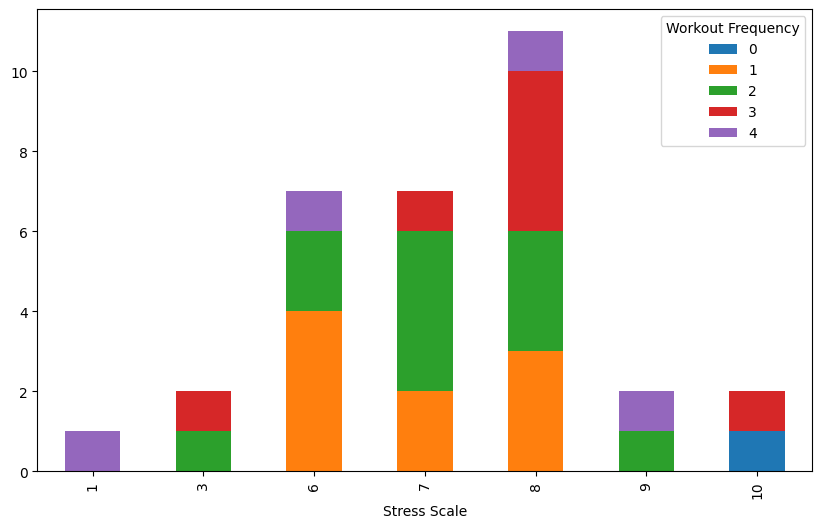

In [ ]:
temp_data = pd.crosstab(df['Stress Scale'], df['Workout Frequency'])
ax = temp_data.plot.bar(stacked=True, figsize=(10, 6))
plt.show()

Stacked bar - Stress vs new people

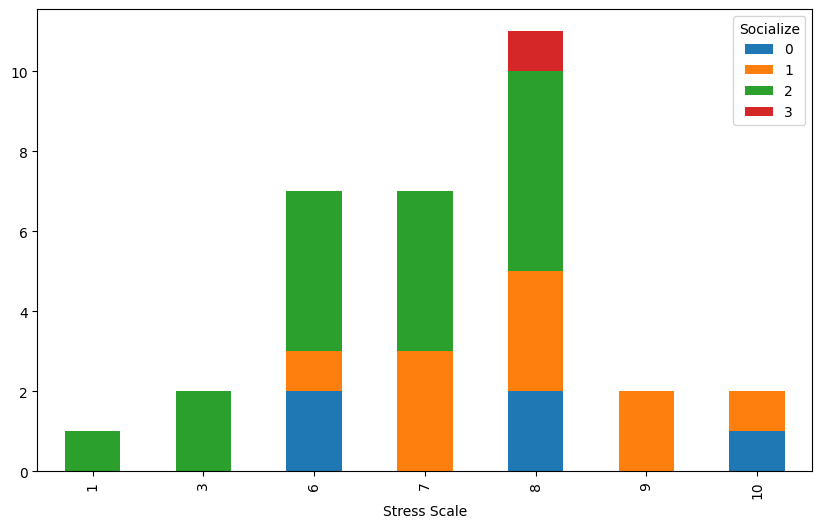

In [ ]:
temp_data = pd.crosstab(df['Stress Scale'], df['Socialize'])
ax = temp_data.plot.bar(stacked=True, figsize=(10, 6))
plt.show()

Stacked bar - Stress vs employment

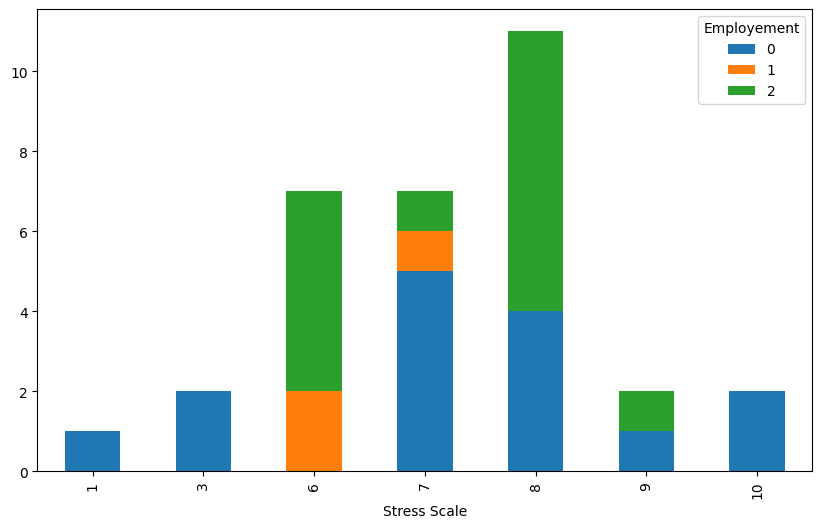

In [ ]:
temp_data = pd.crosstab(df['Stress Scale'], df['Employement'])
ax = temp_data.plot.bar(stacked=True, figsize=(10, 6))
plt.show()

Scatter

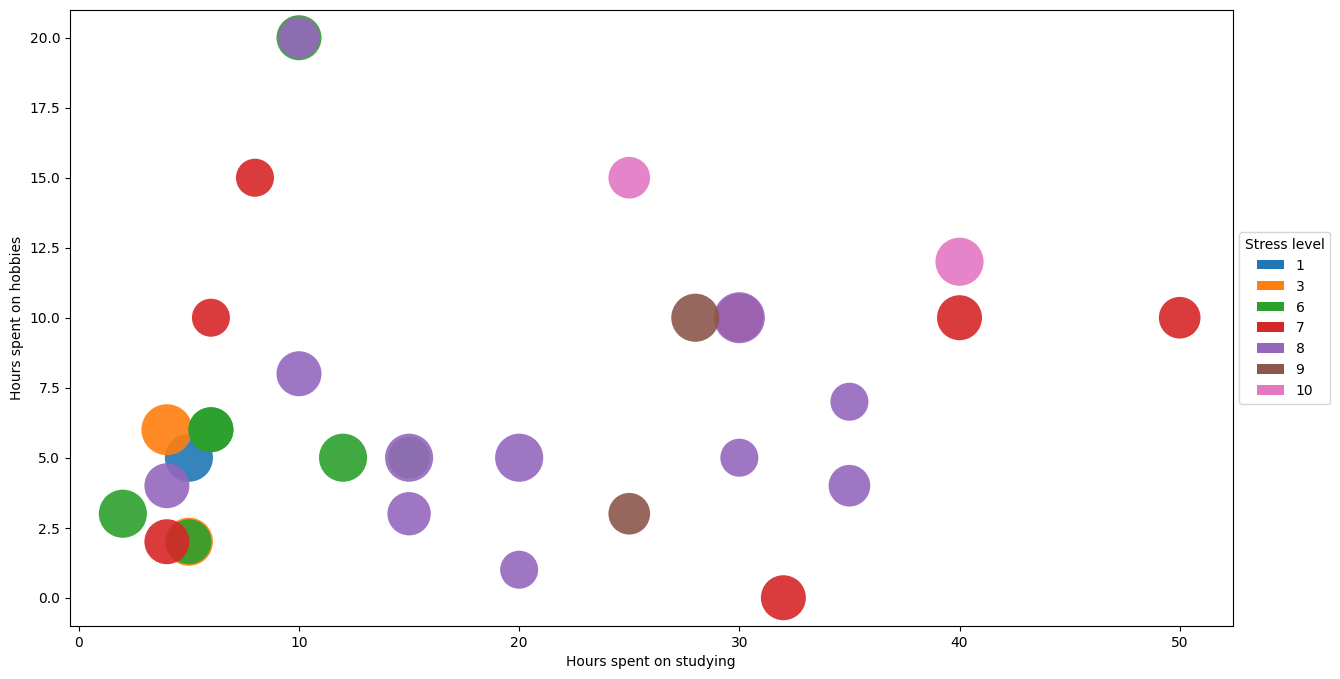

In [ ]:
var = list(set(df['Stress Scale']))
COLORS = [x for x in ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2'][:len(var)]]

fig, ax = plt.subplots(figsize=(15, 8))
for label, color in zip(var, COLORS):
  ax.scatter(x = df[df['Stress Scale'] == label]['Study Hours'],
             y = df[df['Stress Scale'] == label]['Hobbie Hours'],
             s = df[df['Stress Scale'] == label]['Sleep Hours']*150,
             label = label,
             c = color,
             edgecolors='none',
             alpha = 0.9)

handles = [
    Patch(facecolor=color, label=label)
    for label, color in zip(var, COLORS)
]
plt.legend(handles=handles,
           loc='center left',
           bbox_to_anchor=(1, 0.5),
           title = 'Stress level')
plt.xlabel('Hours spent on studying')
plt.ylabel('Hours spent on hobbies')
plt.show()

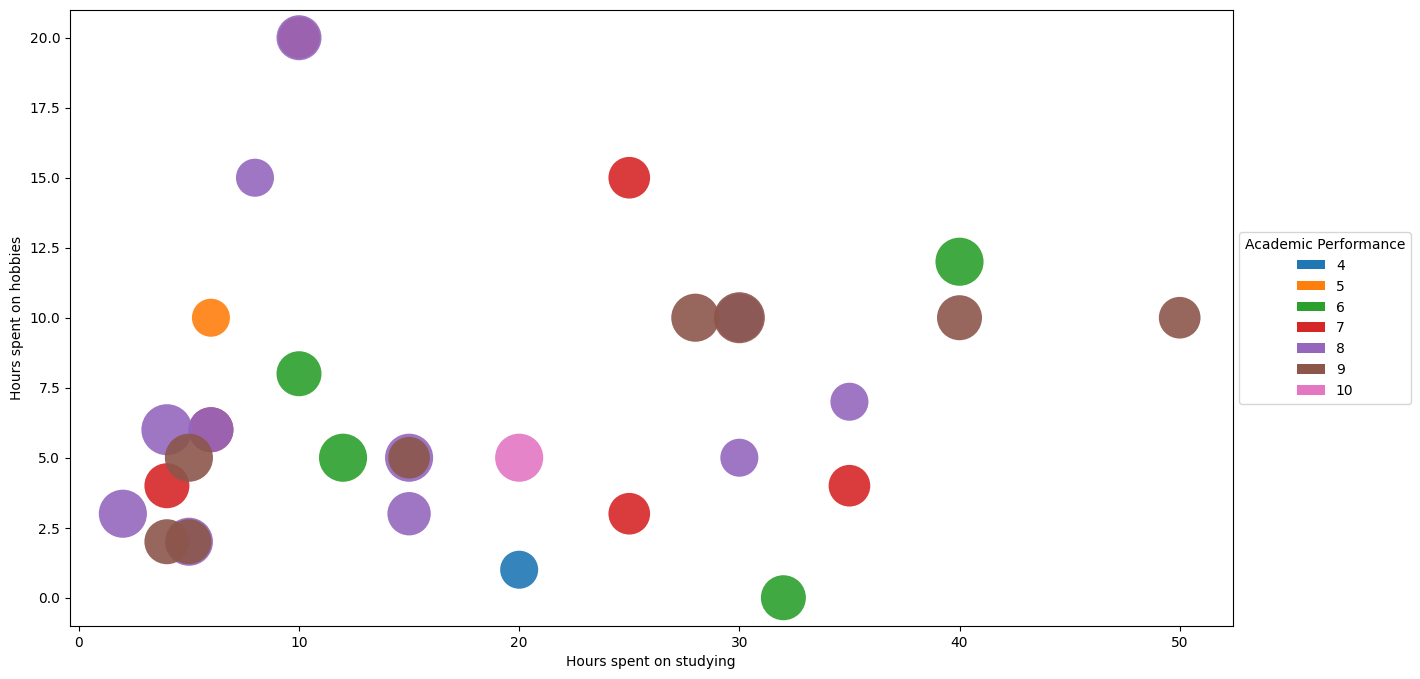

In [ ]:
var = list(set(df['Academic Performance']))
COLORS = [x for x in ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2'][:len(var)]]

fig, ax = plt.subplots(figsize=(15, 8))
for label, color in zip(var, COLORS):
  ax.scatter(x = df[df['Academic Performance'] == label]['Study Hours'],
             y = df[df['Academic Performance'] == label]['Hobbie Hours'],
             s = df[df['Academic Performance'] == label]['Sleep Hours']*150,
             label = label,
             c = color,
             edgecolors='none',
             alpha = 0.9)

handles = [
    Patch(facecolor=color, label=label)
    for label, color in zip(var, COLORS)
]
plt.legend(handles=handles,
           loc='center left',
           bbox_to_anchor=(1, 0.5),
           title = 'Academic Performance')
plt.xlabel('Hours spent on studying')
plt.ylabel('Hours spent on hobbies')
plt.show()

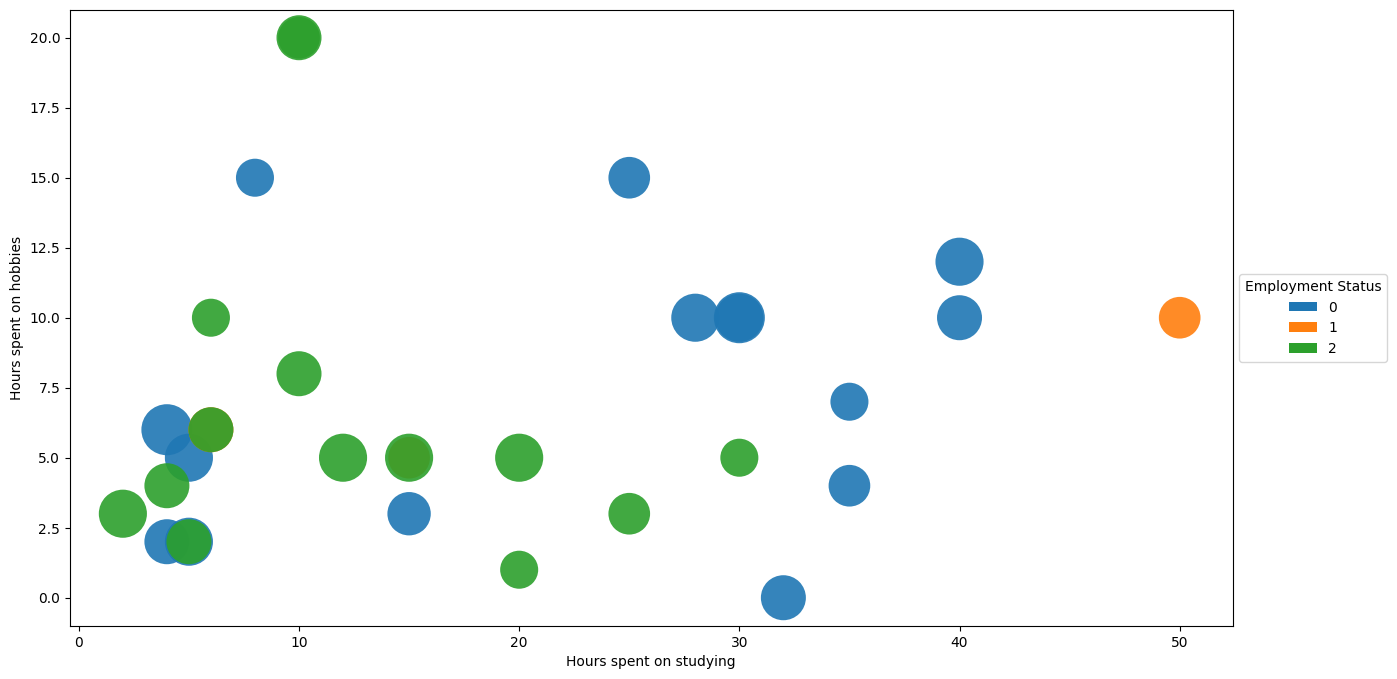

In [ ]:
var = list(set(df['Employement']))
COLORS = [x for x in ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2'][:len(var)]]

fig, ax = plt.subplots(figsize=(15, 8))
for label, color in zip(var, COLORS):
  ax.scatter(x = df[df['Employement'] == label]['Study Hours'],
             y = df[df['Employement'] == label]['Hobbie Hours'],
             s = df[df['Employement'] == label]['Sleep Hours']*150,
             label = label,
             c = color,
             edgecolors='none',
             alpha = 0.9)

handles = [
    Patch(facecolor=color, label=label)
    for label, color in zip(var, COLORS)
]
plt.legend(handles=handles,
           loc='center left',
           bbox_to_anchor=(1, 0.5),
           title = 'Employment Status')
plt.xlabel('Hours spent on studying')
plt.ylabel('Hours spent on hobbies')
plt.show()

In [ ]:
# import pandas as pd

# target_letters = ['Academic pressure', ' Financial concerns', ' Social relationships', ' Health and Well-being', ' Future Uncertainty', ' Lack of time outside of school and work']

# # Initialize an empty DataFrame to store results
# result_df = pd.DataFrame(columns=target_letters)

# # Iterate through each row
# for _, row in df.iterrows():
#     # Split the comma-separated values into a list
#     values = row['Stress Factor'].split(',')

#     # Initialize a dictionary to store factors for the current row
#     factors_dict = {letter: 1 if letter in values else 0 for letter in target_letters}

#     # Append the row to the result DataFrame
#     result_df = result_df.append(factors_dict, ignore_index=True)


In [ ]:
import pandas as pd

target_letters = ['Academic pressure', ' Financial concerns', ' Social relationships', ' Health and Well-being', ' Future Uncertainty', ' Lack of time outside of school and work']
#result_dfs = [pd.DataFrame({letter: [1 if letter in values else 0] for letter in target_letters}) for values in df['Stress Factor'].str.split(',')]
#result_df = pd.concat(result_dfs, ignore_index=True)

#From ChatGPT
result_df = pd.DataFrame()
for factor in target_letters:
    result_df[factor] = df['Stress Factor'].apply(lambda x: 1 if factor in x else 0)


In [ ]:
result_df

,Academic pressure,Financial concerns,Social relationships,Health and Well-being,Future Uncertainty,Lack of time outside of school and work
0,1,0,1,0,1,0
1,1,0,0,0,1,0
2,1,0,0,0,0,0
3,1,0,1,1,1,0
4,1,0,0,0,1,0
5,0,0,0,0,0,0
6,1,0,0,0,1,0
7,1,0,0,0,1,0
8,1,0,1,0,1,0
9,1,0,0,0,0,0


In [ ]:
count_ones = result_df.sum()

In [ ]:
count_test = test_result_df.sum()

In [ ]:
count_ones

Academic pressure                           30
 Financial concerns                          5
 Social relationships                        6
 Health and Well-being                       9
 Future Uncertainty                         18
 Lack of time outside of school and work     1
dtype: int64

In [ ]:
count_test

Academic pressure                           30
 Financial concerns                          5
 Social relationships                        6
 Health and Well-being                       9
 Future Uncertainty                         18
 Lack of time outside of school and work     1
dtype: int64

# Topic Modeling for Problems

## Wordclouds

In [ ]:
wordcloud = WordCloud(background_color="white",
                      width=800,
                      height=400,
                      max_words=1000,
                      contour_width = 3,
                      relative_scaling = 0.5,
                      collocations = False,
                      contour_color='steelblue')

In [ ]:
stop_words = nltk.corpus.stopwords.words('english')
stop_words += ['problems', 'lot', 'harder', 'stress', 'none', 'related']
punctuation = set(string.punctuation)

problems_list = [x for x in df['Problems'] if str(x) != 'nan']

# Remove the stop words and punctuation from the text
problems = []
for entry in problems_list:
  words = nltk.word_tokenize(entry)
  words = [x.lower() for x in words]
  problems += [word for word in words if word not in stop_words and word not in punctuation]

problems = ' '.join(problems)

(-0.5, 799.5, 399.5, -0.5)

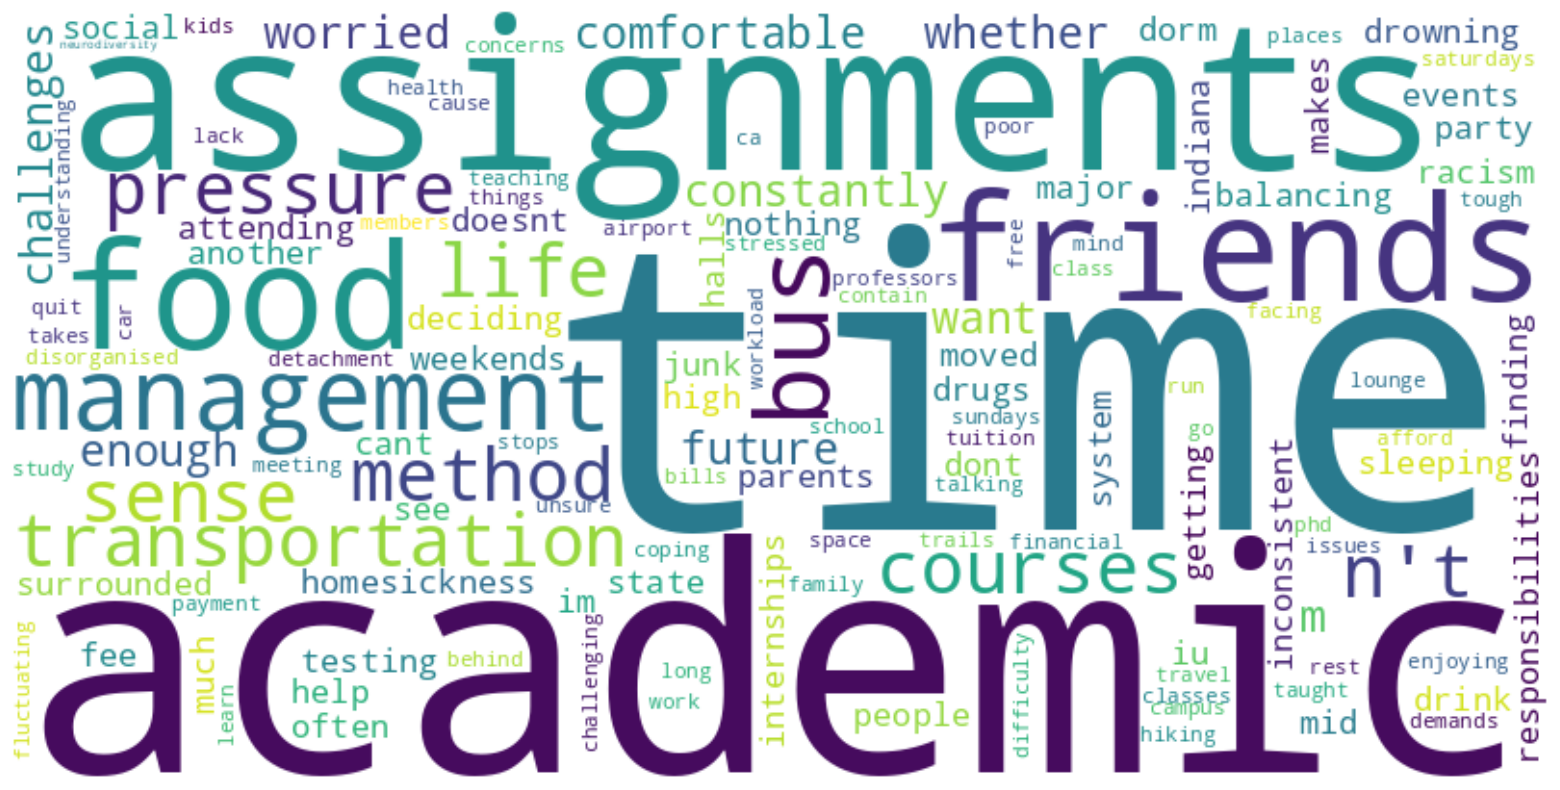

In [ ]:
wordcloud.generate(problems)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

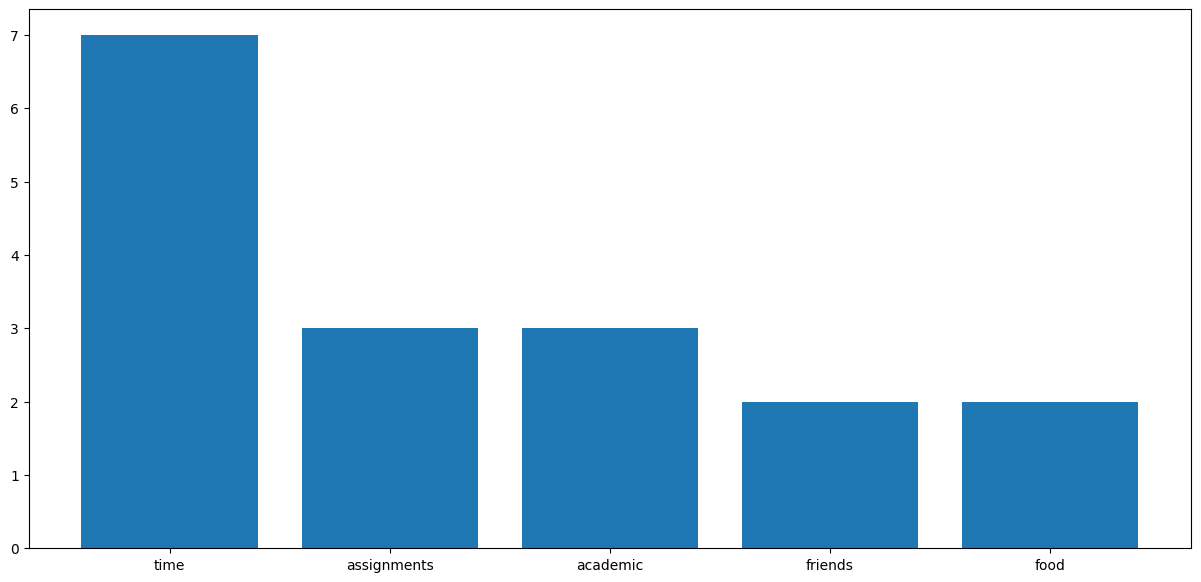

In [ ]:
problems_ = word_tokenize(problems)
freq_problems = FreqDist(problems_)
top_5 = dict(freq_problems.most_common(5))

plt.figure(figsize=(15,7))
plt.bar(top_5.keys(), top_5.values())
plt.show()

## LDA Topic modeling

[A Beginner's Guide to Latent Dirichlet Allocation (LDA)](https://towardsdatascience.com/latent-dirichlet-allocation-lda-9d1cd064ffa2)

### Important Functions

In [ ]:
def split_sentences(sentences):
    temp = []
    for sentence in sentences:
        temp.append(sentence.split())
    return temp

def topic(model, sentence, corpus):
    new_text_corpus =  corpus.doc2bow(sentence.split())
    num_topics = len(model[new_text_corpus])
    if num_topics == 0:
        return 'nan'
    if num_topics == 1:
        return model[new_text_corpus][0][0]
    else:
        max = model[new_text_corpus][0]
        for x in range(num_topics):
            if model[new_text_corpus][x][1] > max[1]:
                max = model[new_text_corpus][x]
        return max[0]

### Data preprocessing

In [ ]:
problems_list = [x for x in df['Problems'] if str(x) != 'nan']
problems_sentences = list(split_sentences(problems_list))
dictionary = corpora.Dictionary(problems_sentences)
bag_of_words = [dictionary.doc2bow(word) for word in problems_sentences] # Term Document Frequency

### Model

In [ ]:
lda_model = gensim.models.LdaMulticore(corpus = bag_of_words, id2word = dictionary,  num_topics = 3)

### Applying the model to dataset

In [ ]:
topic_identity = []

for p in list(df['Problems']):
  if str(p) != 'nan':
    topic_identity.append(topic(lda_model, p, dictionary))
  else:
    topic_identity.append('nan')

### Results (SHITTY)

In [ ]:
pd.DataFrame({"problem": list(df['Problems']),
              "assigned topic": topic_identity})

,problem,assigned topic
0,"Attending social events, drowning in assignments",1
1,NaN,nan
2,NaN,nan
3,"Homesickness, finding friends",1
4,Balancing responsibilities,2
5,"Food halls are mid, too much junk food",1
6,No problems,0
7,NaN,nan
8,Deciding my major,0
9,NaN,nan


# Topic Modeling for Stress Cope

## Wordcloud

In [ ]:
stop_words = nltk.corpus.stopwords.words('english')
#stop_words += ['problems', 'lot', 'harder', 'stress', 'none', 'related']
punctuation = set(string.punctuation)

cope_list = [x for x in df['Stress Cope'] if str(x) != 'nan']

# Remove the stop words and punctuation from the text
cope = []
for entry in cope_list:
  words = nltk.word_tokenize(entry)
  words = [x.lower() for x in words]
  cope += [word for word in words if word not in stop_words and word not in punctuation]

cope = ' '.join(cope)

(-0.5, 799.5, 399.5, -0.5)

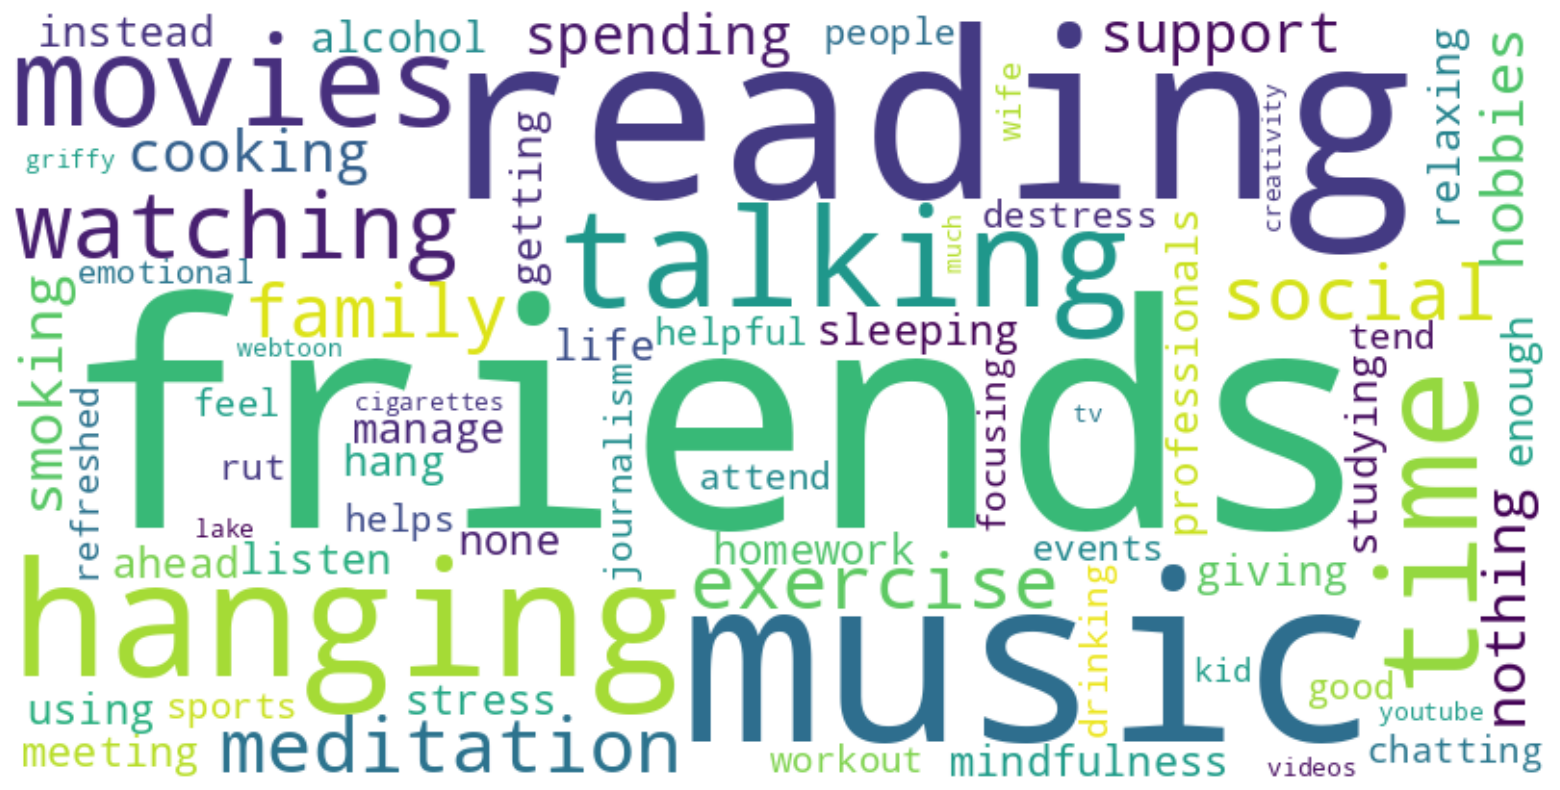

In [ ]:
wordcloud.generate(cope)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

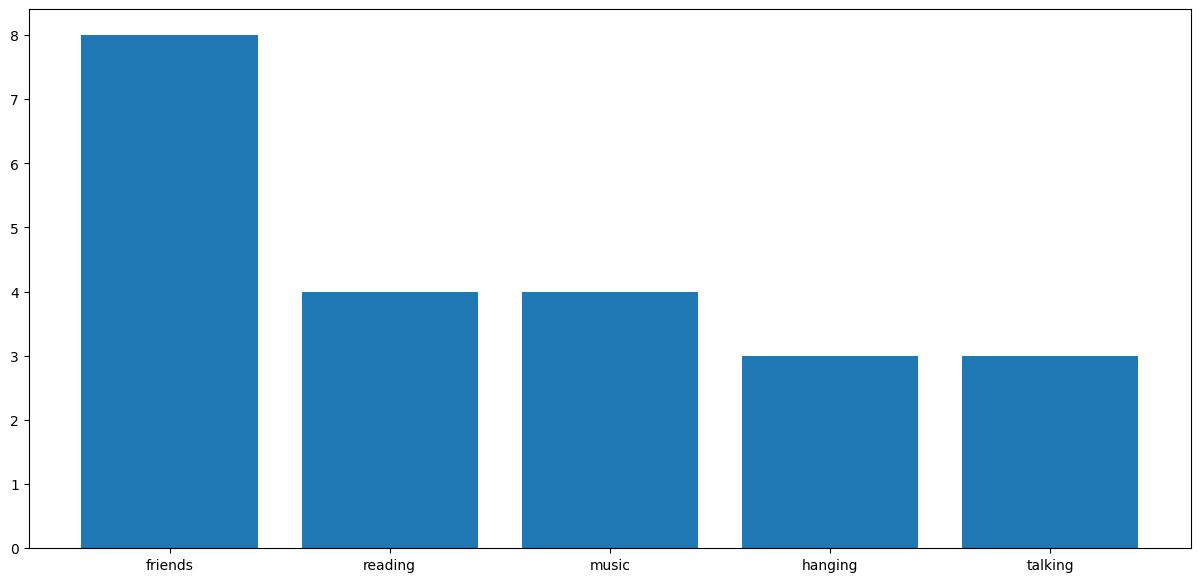

In [ ]:
cope_ = word_tokenize(cope)
freq_= FreqDist(cope_)
top_5 = dict(freq_.most_common(5))

plt.figure(figsize=(15,7))
plt.bar(top_5.keys(), top_5.values())
plt.show()